In [1]:
from pathlib import Path
import sys

sys.path.append(str(Path('').absolute().parent))

In [2]:
from pathlib import Path
import numpy as np
import pandas as pd
from scripts.morgan_handler import get_morgan_fingerprints
import json
from sklearn.model_selection import train_test_split

In [3]:
ROOT = Path('.').absolute().parent 
data_dir = ROOT / 'data'

# Visualizar bits

In [4]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import (Draw,
                        Descriptors,
                        AllChem)

In [5]:
df_smiles = pd.read_csv(data_dir / 'egfr_erbB1_smiles.csv', index_col=0)
df_smiles.head()

,chembid,smiles_notation
0,CHEMBL301018,COc1cc2ncnc(Nc3ccc(F)c(Cl)c3)c2cc1OC
1,CHEMBL281543,C=CC(=O)Nc1nc2c(Nc3ccc(F)c(Cl)c3)ncnc2cc1CCCCN...
2,CHEMBL401930,Cc1cc(N2CCOCC2)cc2[nH]c(-c3c(NC[C@@H](O)c4cccc...
3,CHEMBL274654,Cc1[nH]c(/C=C2\C(=O)Nc3ccccc32)c(C)c1CCC(=O)O
4,CHEMBL382822,COc1cc2ncnc(Nc3cccc(Cl)c3F)c2cc1CN1CCC[C@@H]1C...


In [6]:
with open(data_dir / 'bit_info.json', 'r') as file:
    chembl_to_bitinfo = json.load(file)

In [7]:
# funções de conveniência
def get_mol(chembl, df_smiles):
    smiles = df_smiles[df_smiles['chembid'] == chembl].iloc[0,1]
    mol = Chem.MolFromSmiles(smiles)
    return mol

def plot_activated_bit(chembl, bit_index, df_smiles):
    mol = get_mol(chembl, df_smiles)
    bit_info = chembl_to_bitinfo[chembl]        
    if not bit_info.get(str(bit_index), None):        
        return None
    
    mgfp_bit = AllChem.GetMorganFingerprintAsBitVect(mol, radius=2,
                                                      nBits=2048,
                                                      bitInfo=bit_info)

    svg = Draw.DrawMorganBit(mol, bit_index, bit_info, useSVG=True)
    return svg

Bit 1367 ----------------------------------------------


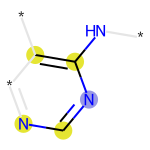

Bit 1226 ----------------------------------------------


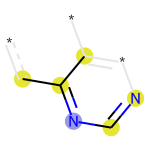

Bit 1452 ----------------------------------------------


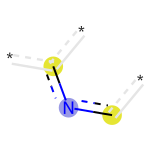

Bit 329 -----------------------------------------------


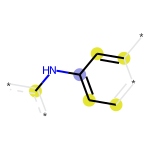

Bit 1928 ----------------------------------------------


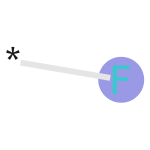

Bit 1482 ----------------------------------------------


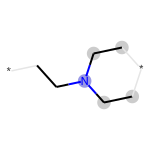

Bit 489 -----------------------------------------------


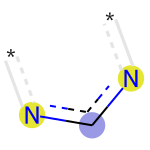

Bit 366 -----------------------------------------------


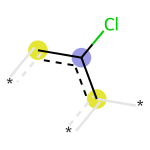

Bit 1077 ----------------------------------------------


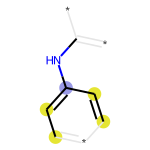

Bit 650 -----------------------------------------------


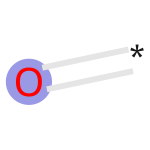

In [9]:
top_10_bits = [1367, 1226, 1452, 329, 1928, 1482, 489, 366, 1077, 650]

for bit_num in top_10_bits:
    search_bit = str(bit_num)
    print('Bit {}'.format(search_bit), '-'*(50 - len(search_bit)))

    # get bit info corresponding to it
    chemblid, bi = [(_id, bit_info) for _id, bit_info in chembl_to_bitinfo.items()
                    if search_bit in list(bit_info.keys())][0]
    
    search_mol = get_mol(chemblid, df_smiles)
    bit_img = Draw.DrawMorganBit(search_mol, search_bit, bi, useSVG=True)
    display(bit_img)